---
format: 
    html:
        embed-resources: true
---


# Clustering lab

**Objective:** Apply various clustering algorithms using Scikit-learn to the penguins dataset to discover natural groupings. Perform hyperparameter tuning to optimize clustering performance. Utilize KMeans, DBSCAN, and Spectral Clustering methods. Avoid dimensionality reduction techniques.

**Submission**: Upload the completed form of this notebook to Canvas, make sure to verify the resources have been properly embedded.

- Code for all steps, organized and annotated.
- Visualizations with clear titles, labels, and legends.
- Explanations and observations in markdown cells.

**Setup and Data Loading:**

- Import the necessary libraries:
  - `pandas` for data manipulation.
  - `numpy` for numerical computations.
  - `seaborn` and `matplotlib.pyplot` for data visualization.
  - Scikit-learn modules:
    - `StandardScaler` from `sklearn.preprocessing` for data scaling.
    - Clustering algorithms: `KMeans`, `DBSCAN`, `AgglomerativeClustering`, `SpectralClustering` from `sklearn.cluster`.
    - Evaluation metrics: `silhouette_score`, `calinski_harabasz_score` from `sklearn.metrics`.
- Load the penguins dataset using `seaborn.load_dataset('penguins')`.
- Display the first few rows of the dataset to understand its structure.

In [9]:
# Import data manipulation and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Scikit-learn modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the penguins dataset
data = sns.load_dataset('penguins')

# Display the first few rows
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Data Preprocessing:**

- Drop rows with missing values to simplify analysis.
- Generate descriptive statistics of the features.
- **Data Scaling:**
  - Use `StandardScaler` to standardize the features.

In [3]:
# Drop rows with missing values to simplify analysis
data = data.dropna()

# Generate descriptive statistics of the features
print("Descriptive statistics of the features:")
print(data.describe())

# Select numerical features for scaling
features = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Use StandardScaler to standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features to a DataFrame for easier inspection
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
print("\nStandardized features:")
print(scaled_data.head())

Descriptive statistics of the features:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

Standardized features:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    

**Exploratory Data Analysis (EDA):**


- Visualize pairwise relationships using `seaborn.pairplot` to understand potential clusters.
- **Feature Selection:**
  - Select relevant numerical features for clustering, candidates include
    - `bill_length_mm`
    - `bill_depth_mm`
    - `flipper_length_mm`
    - `body_mass_g`
  - remove highly correlated features if needed. 


In [4]:
# Select relevant numerical features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data_selected = data[features]

# Visualize pairwise relationships
plt.suptitle("Pairwise Relationships of Features", y=1) 
plt.show()

# Calculate correlation matrix
correlation_matrix = data_selected.corr()
print("Correlation matrix:")
print(correlation_matrix)

<Figure size 640x480 with 0 Axes>

Correlation matrix:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


**Clustering with KMeans:**

K-means clustering partitions data into k-clusters by minimizing variance within each cluster. It iteratively assigns data points to the nearest centroid and updates centroids based on cluster means, repeating until convergence or minimal centroid shift.

The most important hyper-parameters for K-means are the number of clusters $k$ and initialization method. $k$ directly affects cluster quality, while initialization (e.g., random, k-means++) influences convergence speed and the likelihood of avoiding poor local optima.

`Instructions:`

**Hyper-parameter tuning:**

- **Determining Optimal k:**
  - Use the **Elbow Method**:
  - Plot results vs. `k` to find the "elbow point".
- Use the **Silhouette Score**:
  - Calculate the silhouette score for each `k` in the same range.
  - Plot silhouette score vs. `k` to determine the optimal number of clusters.
- You are using two hyper-parameters search methods with different feed-back signals, use the final result that seems best to you. 

**Final result:**

**Apply KMeans:**

- Initialize `KMeans` with the optimal `n_clusters`.
- Fit the model to the scaled data.
- Predict cluster labels.

**Visualization:**

- Create scatter plots of the clusters using two features.

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


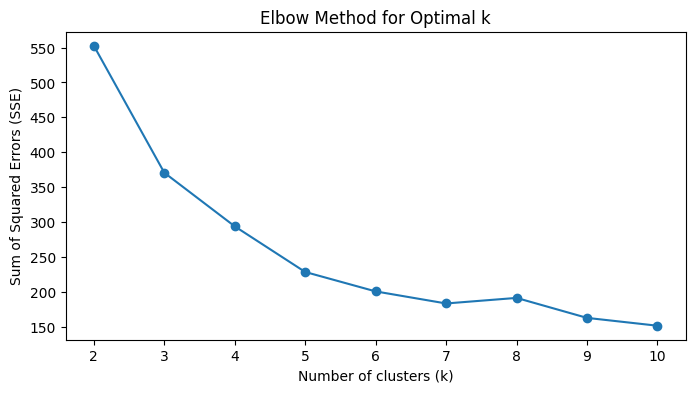

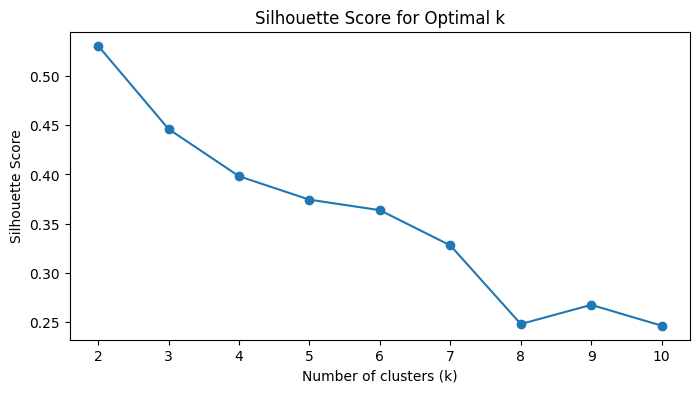

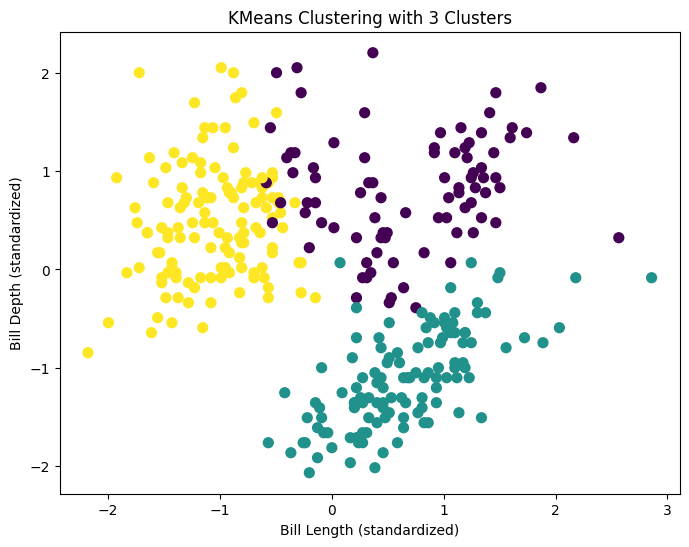

In [5]:
# Determine optimal k
sse = [] 
k_range = range(2, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)  

# Plot SSE
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

# Determine optimal k
silhouette_scores = [] 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels)) 

# Plot silhouette score vs. k
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose the optimal k 
optimal_k = 3 

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Visualize the clustering results using two features
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f"KMeans Clustering with {optimal_k} Clusters")
plt.xlabel("Bill Length (standardized)")
plt.ylabel("Bill Depth (standardized)")
plt.show()

**Clustering with DBSCAN:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies clusters based on data point density. It groups points closely packed within a certain distance (ε) and defines points as core, border, or noise. Clusters grow from core points, with border points nearby, while noise points are left un-clustered.

The most important DBSCAN hyper-parameters are the neighborhood radius $(\epsilon)$ and minimum points (MinPts). $\epsilon$ defines the distance for neighbors to form dense regions, while MinPts ensures a minimum density for core points, affecting cluster formation and distinguishing noise from clusters.

```
class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```

Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

This implementation has a worst case memory complexity of , which can occur when the eps param is large and min_samples is low, while the original DBSCAN only uses linear memory. For further details, see the Notes below.

<sup> **Source**: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html  </sup> 


`Instructions:`

**Hyper-parameter tuning:**

- Adjust `eps` and `min_samples` to improve clustering results.
- Determine appropriate values for `eps` (epsilon) and `min_samples` with a 2-variable hyper-parameter grid-search using silhouette scores as the feedback signal.
- From this find the optional value

**Final result:**

- **Apply DBSCAN:**
  - Initialize `DBSCAN` with chosen optimal parameters.
  - Fit the model and predict cluster labels.
- **Evaluation:**
  - Note that DBSCAN may assign some points as noise (`-1` label).
- **Visualization:**
  - Plot the clusters, marking noise points distinctly.

Best eps: 0.9, Best min_samples: 7, Best silhouette score: 0.5116014036461483


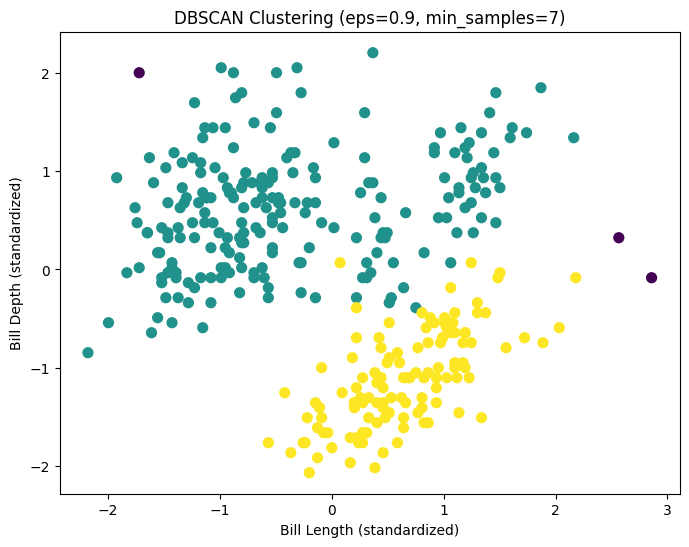

In [6]:
# Define ranges for eps and min_samples for grid search
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(2, 10)    

# Initialize variables
best_eps = None
best_min_samples = None
best_score = -1

# Hyper-parameter tuning using silhouette score
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        
        # Check if there are more than one cluster
        if len(set(labels)) > 1:
            score = silhouette_score(scaled_features, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")

# Apply DBSCAN with the best parameters found
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Visualization of DBSCAN clustering results
plt.figure(figsize=(8, 6))
# Use a color map to distinguish clusters; -1 label (noise) is displayed in black
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis', s=50, marker='o')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Bill Length (standardized)")
plt.ylabel("Bill Depth (standardized)")
plt.show()

**Clustering with Spectral Clustering:**

Spectral clustering groups data by leveraging the eigenvalues of a similarity matrix. It transforms the data into a lower-dimensional space using a graph Laplacian, where points are more easily separable. Standard clustering algorithms like k-means are then applied to these transformed points, producing well-separated clusters based on graph structure.

The most important hyper-parameters for spectral clustering are the number of clusters ( $k$ ) and the similarity function. $k$ determines the number of clusters, while the similarity function (e.g., Gaussian kernel) affects the construction of the similarity matrix, influencing cluster separability and performance.

```
class sklearn.cluster.SpectralClustering(n_clusters=8, *, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol='auto', assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False)
```

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

If the affinity matrix is the adjacency matrix of a graph, this method can be used to find normalized graph cuts [1], [2].

When calling fit, an affinity matrix is constructed using either a kernel function such the Gaussian (aka RBF) kernel with Euclidean distance d(X, X):

<sup> **Source**: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.SpectralClustering.html </sup> 


`Instructions:`

**Hyper-parameter tuning:**

- Decide on the number of clusters to use by varying the `n_clusters` parameter and using silhouette scores as the feedback signal.

**Final result:**

- **Apply Spectral Clustering:**
  - Initialize `SpectralClustering` with chosen optimal parameters.
  - Fit the model and predict cluster labels.
- **Visualization:**
  - Plot the resulting clusters.

Best n_clusters: 4, Best silhouette score: 0.41557670470435315


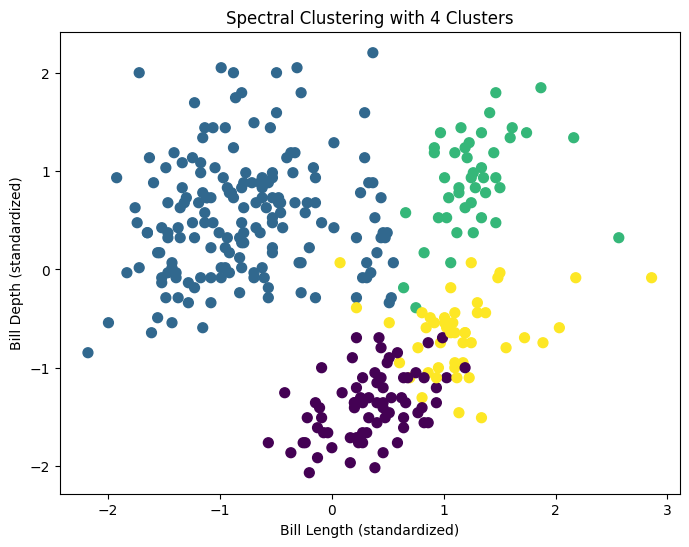

In [7]:
# Define range for n_clusters to perform hyper-parameter tuning
n_clusters_range = range(4, 11)

# Initialize variables to track the best parameters and best silhouette score
best_n_clusters = None
best_score = -1

# Hyper-parameter tuning
for n_clusters in n_clusters_range:
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=0)
    labels = spectral.fit_predict(scaled_features)
    
    # Calculate silhouette score for each n_clusters
    score = silhouette_score(scaled_features, labels)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"Best n_clusters: {best_n_clusters}, Best silhouette score: {best_score}")

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=best_n_clusters, affinity='rbf', random_state=0)
spectral_labels = spectral.fit_predict(scaled_features)

# Results
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=spectral_labels, cmap='viridis', s=50)
plt.title(f"Spectral Clustering with {best_n_clusters} Clusters")
plt.xlabel("Bill Length (standardized)")
plt.ylabel("Bill Depth (standardized)")
plt.show()

## Optional: Agglomerative Clustering

This is just for optional practice, it is not required, and doesn't result in any extra credit.

**Clustering with Agglomerative Clustering:**

- **Linkage Criteria:**
    - Try different linkage methods: `'ward'`, `'complete'`, `'average'`, `'single'`.
- **Apply Agglomerative Clustering:**
    - Initialize `AgglomerativeClustering` with a reasonable number of clusters and chosen linkage.
    - Fit the model and predict cluster labels.
- **Evaluation:**
    - Compute silhouette and Calinski-Harabasz scores.
- **Hyperparameter Tuning:**
    - Adjust `n_clusters` and linkage methods to optimize clustering performance.
- **Visualization:**
    - Plot dendrograms using `scipy.cluster.hierarchy` if desired.
    - Visualize the clusters in scatter plots.
